In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from polyphony import Polyphony
from polyphony.data import load_pancreas
from polyphony.tool import projection

Global seed set to 0


# Data Preparation

In this example, we use the `Pancreas` dataset from the [scArches example](https://scarches.readthedocs.io/en/latest/scvi_surgery_pipeline.html). Two batches of the data (`Pancreas CelSeq2` and `Pancreas SS2`) are used as for query. And the rest makes up the reference dataset.

In [3]:
ref, query = load_pancreas()

In [4]:
pp = Polyphony('test', ref, query)

# Model Building

### Step-0: setup the data

In [5]:
pp.setup_anndata()

INFO     Using batches from adata.obs["batch"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 7290 cells, 1000 vars, 4 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
INFO     Using batches from adata.obs["batch"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 8

### Step-1: build reference model and the initial query model

In [6]:
pp.init_reference_step()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [09:15<00:00,  1.39s/it, loss=296, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cell_update', 'desired_rep']      
INFO     Successfully registered anndata object containing 8391 cells, 1000 vars, 5 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Training: 0it [00:00, ?it/s]

In [7]:
import scanpy as sc
import matplotlib.pyplot as plt

def display_umap(matrix, color=None):
    plt.figure()
    sc.pl.umap(matrix, color=color, frameon=False, wspace=0.6)

In [8]:
# projection.umap_transform(ref, query)/
# display_umap(pp.ref.adata.concatenate(pp.qry.adata), color=["source", "cell_type"])

### Step-2: refine the query model 

In [9]:
pp.recommend_anchors()

... storing 'batch' as categorical
... storing 'source' as categorical
/Users/chengfurui/miniconda3/envs/polyphony-env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/chengfurui/miniconda3/envs/polyphony-env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/chengfu

In [10]:
pp.setup_anndata_anchors(pp.anchors)
pp.model_update_step(max_epochs=10)

/Users/chengfurui/miniconda3/envs/polyphony-env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 10/10: 100%|██████████| 10/10 [00:11<00:00,  1.12s/it, loss=423, v_num=1]


... storing 'study' as categorical
... storing 'source' as categorical
... storing 'anchor_cluster' as categorical
... storing 'pred' as categorical


<Figure size 800x800 with 0 Axes>

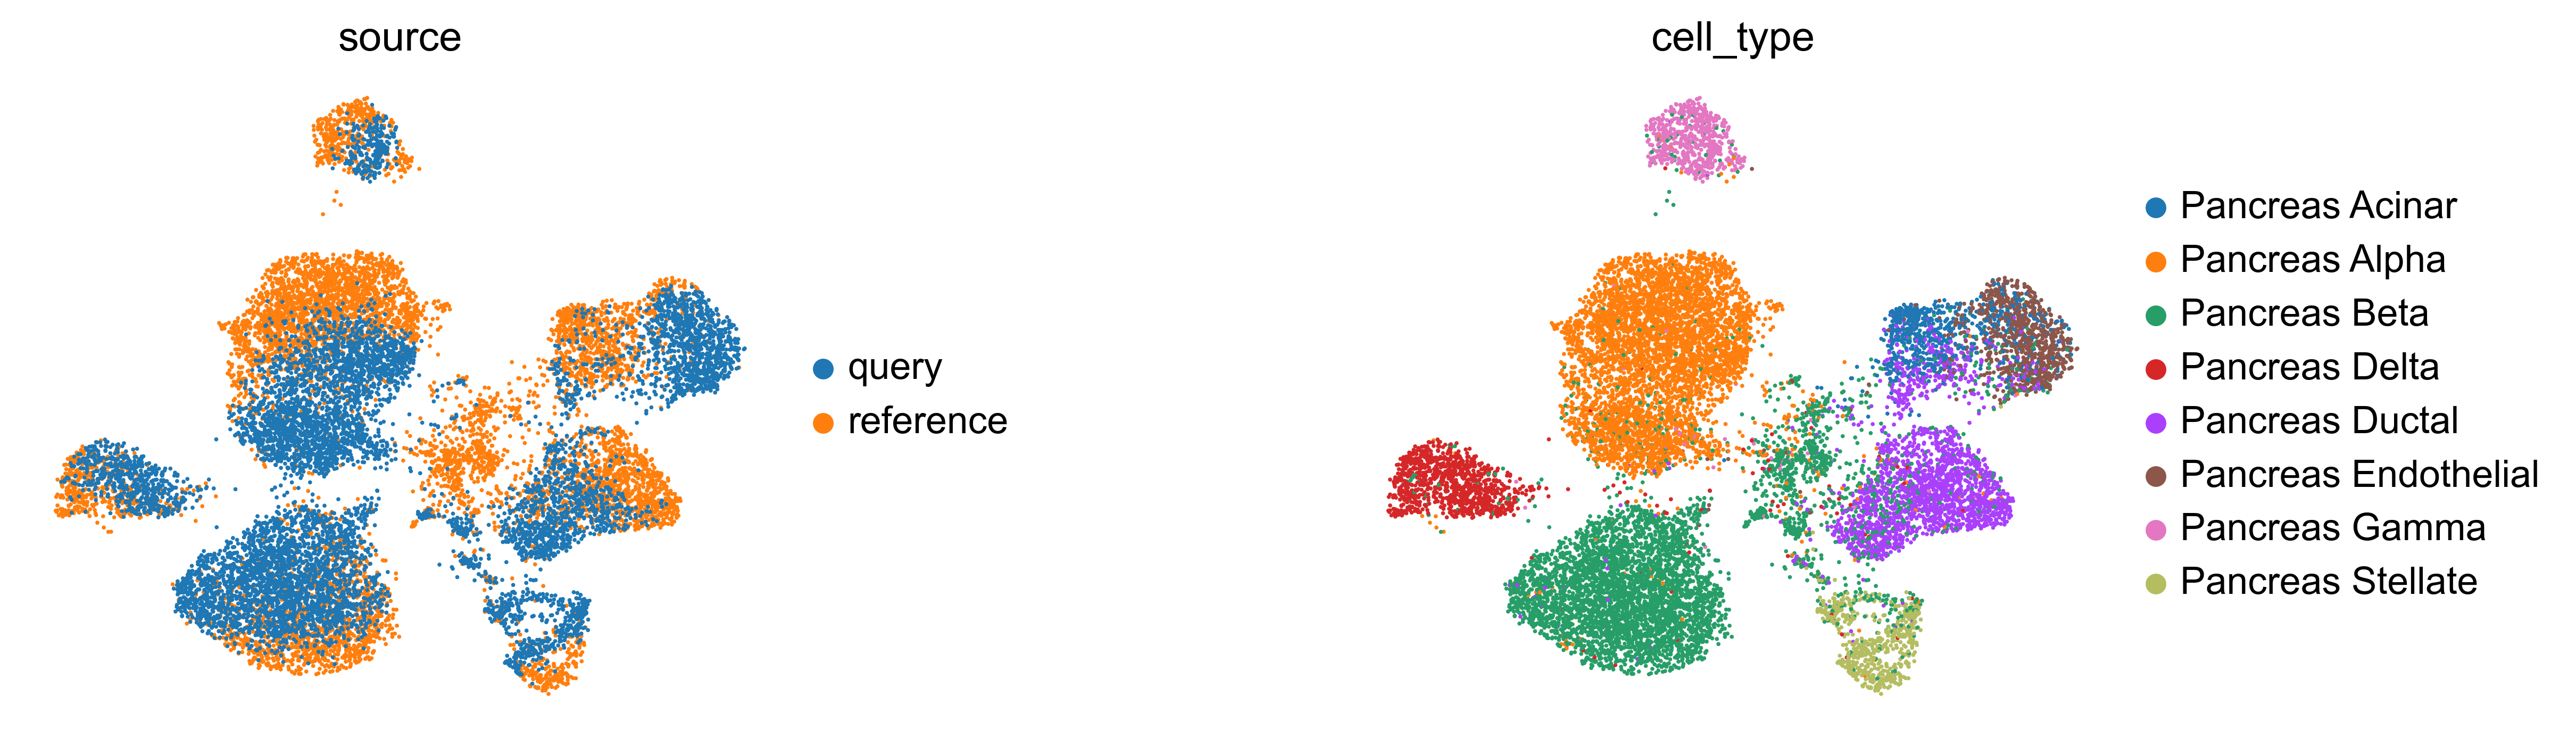

In [11]:
projection.umap_transform(ref, query)
display_umap(pp.ref.adata.concatenate(pp.qry.adata), color=["source", "cell_type"])